<a href="https://colab.research.google.com/github/revatim/Devanagri-image-to-text/blob/master/CS617_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Required Elements for model training

In [0]:
import random
import numpy as np
import pandas as pd
# plotting imports
import matplotlib.pyplot as plt
#  preprocessing imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
#  Model imports
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.utils.np_utils import to_categorical
# for importing model
from keras.models import model_from_json

Using TensorFlow backend.


# Convert Data from Image to pixels and label 

In [0]:
# #Convert data from images to csv # #This function will run seperately and data.csv is saved in a folder
# from PIL import Image
# import numpy as np
# import sys
# import os
# import csv

# BASE_DIR = 'C:/Users/reuat/Downloads/dataset/DevanagariHandwrittenCharacterDataset/'
# train_folder = BASE_DIR+'Test/' 

# def getFiles(myDir, format='.png'):
# 	fileList = []
# 	for root, dirs, files in os.walk(myDir, topdown=False):
# 	    for name in files:
# 	        if name.endswith(format):
# 	            fullName = os.path.join(root, name)
# 	            fileList.append(fullName)
# 	return fileList

# column_list = ["pixel__" + str(i).zfill(4) for i in range(0,1024)]
# column_list.append('character')
# with open("data4.csv", 'a', newline='') as f:
#     writer = csv.writer(f)
# #     writer.writerow(column_list) #for headers
#     folders_in_train = sorted(os.listdir(train_folder)) #get all folders in the dataset- foldername is the label

#     for folder_name in folders_in_train:
#     	myFileList = getFiles(train_folder + folder_name + '/')
#     	print(folder_name)
#     	for file in myFileList:
#     		img_file = Image.open(file)
#     		img_grey = img_file.convert('L')
#     		value = np.asarray(img_grey.getdata(), dtype=np.int).reshape((img_grey.size[1], img_grey.size[0]))
#     		value = value.flatten()
#     		value = np.append(value, folder_name)
#     		writer.writerow(value)

character_10_yna
character_11_taamatar
character_12_thaa
character_13_daa
character_14_dhaa
character_15_adna
character_16_tabala
character_17_tha
character_18_da
character_19_dha
character_1_ka
character_20_na
character_21_pa
character_22_pha
character_23_ba
character_24_bha
character_25_ma
character_26_yaw
character_27_ra
character_28_la
character_29_waw
character_2_kha
character_30_motosaw
character_31_petchiryakha
character_32_patalosaw
character_33_ha
character_34_chhya
character_35_tra
character_36_gya
character_3_ga
character_4_gha
character_5_kna
character_6_cha
character_7_chha
character_8_ja
character_9_jha
digit_0
digit_1
digit_2
digit_3
digit_4
digit_5
digit_6
digit_7
digit_8
digit_9


# Data Preprocessing

In [0]:
import os
# os.chdir("F:/Semester 8 IIITDMJ/Deep Learning CS617/Project/Run Files/dataset")
# data = pd.read_csv("data.csv")
os.chdir("F:/Semester 8 IIITDMJ/Deep Learning CS617/Project/dataset")
data = pd.read_csv("data4.csv")
print(data.shape)

(92000, 1025)


In [0]:
data.head(6)
# data.drop(columns = ['Unnamed: 0'], inplace = True)
# # ordering data

# data['character'] = data['character'].apply(lambda x: x.split('_')[0] + '_' + x.split('_')[1].zfill(2) )
# data.sort_values('character', inplace = True)

# data.head(n=6)
# data.to_csv('F:/Semester 8 IIITDMJ/Deep Learning CS617/Project/dataset/data4.csv', index = False)


,pixel__0000,pixel__0001,pixel__0002,pixel__0003,pixel__0004,pixel__0005,pixel__0006,pixel__0007,pixel__0008,pixel__0009,...,pixel__1015,pixel__1016,pixel__1017,pixel__1018,pixel__1019,pixel__1020,pixel__1021,pixel__1022,pixel__1023,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01
1341,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01
1340,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01
1339,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01
1338,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01
1337,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01


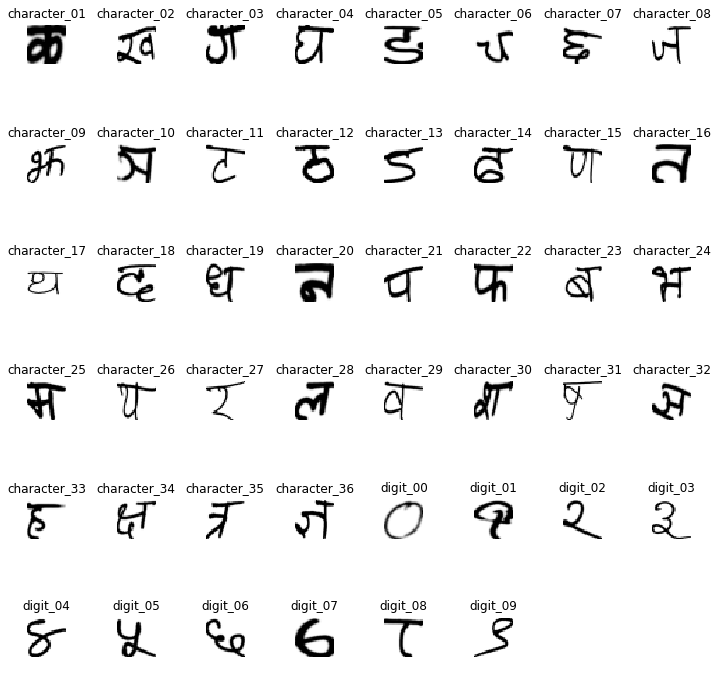

In [0]:
# Visualising data
# The columns are named as pixel__0000 to pixel__1024 and label is character
char_names = data.character.unique()  # get all character names
rows = 6; columns = 8; # display 46 characters
figure, axis = plt.subplots(rows,columns, figsize = (12,12))
for row in range(rows):
    for col in range(columns):
        axis[row, col].set_axis_off()
        if (columns * row + col) < len(char_names):
            x = data[data.character == char_names[columns * row + col]].iloc[0,:-1].values.reshape(32,32)
            x = x.astype("float64")
            x/=255
            axis[row, col].imshow(x, cmap = "binary")
            axis[row, col].set_title(char_names[columns * row + col])

            
plt.subplots_adjust(wspace=1, hspace=1)   
plt.show()

In [0]:
# normalize pixel values (0 to 255 - 0 to 1)
X = data.values[:,:-1]/255.0
Y = data["character"].values
del data
num_classes = 46

In [0]:
le = LabelEncoder()
# le.fit_transform(Y)
Y = le.fit_transform(Y)
Y = to_categorical(Y, num_classes)

le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_))) # Get mapping 
print("This is the mapping of labels", le_name_mapping)

This is the mapping of labels {'character_01': 0, 'character_02': 1, 'character_03': 2, 'character_04': 3, 'character_05': 4, 'character_06': 5, 'character_07': 6, 'character_08': 7, 'character_09': 8, 'character_10': 9, 'character_11': 10, 'character_12': 11, 'character_13': 12, 'character_14': 13, 'character_15': 14, 'character_16': 15, 'character_17': 16, 'character_18': 17, 'character_19': 18, 'character_20': 19, 'character_21': 20, 'character_22': 21, 'character_23': 22, 'character_24': 23, 'character_25': 24, 'character_26': 25, 'character_27': 26, 'character_28': 27, 'character_29': 28, 'character_30': 29, 'character_31': 30, 'character_32': 31, 'character_33': 32, 'character_34': 33, 'character_35': 34, 'character_36': 35, 'digit_00': 36, 'digit_01': 37, 'digit_02': 38, 'digit_03': 39, 'digit_04': 40, 'digit_05': 41, 'digit_06': 42, 'digit_07': 43, 'digit_08': 44, 'digit_09': 45}


In [0]:
# Split to give training and testing data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)
print('Train size = ',x_train.shape," ",y_train.shape)

Train size =  (54740, 1024)   (54740, 46)


In [0]:
# Set Image Variables
img_height_rows = 32
img_width_cols = 32
img_shape = (img_height_rows, img_width_cols, 1)

In [0]:
# Reshape X (train and test)
x_train = x_train.reshape(x_train.shape[0], *img_shape)
x_test = x_test.reshape(x_test.shape[0], *img_shape)

# Model

In [0]:
# Create the CNN Model
# recurring variables
input_activation = 'relu'
output_activation = 'softmax'
cnn = Sequential()
cnn.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = img_shape, activation = input_activation))
cnn.add(Conv2D(filters = 32, kernel_size =(3,3), activation = input_activation))
cnn.add(MaxPool2D(pool_size = (2, 2), strides = (2, 2), padding = 'same'))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(filters = 64, kernel_size = (3,3), activation = input_activation))
cnn.add(Conv2D(filters = 64, kernel_size = (3,3), activation = input_activation))
cnn.add(MaxPool2D(pool_size = (2, 2), strides = (2, 2), padding = 'same'))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(units = 128, activation = input_activation, kernel_initializer = 'uniform'))
cnn.add(Dense(units = num_classes, activation = output_activation, kernel_initializer = 'uniform'))

In [0]:
opt = 'adam'
# try using sgd 
loss = 'categorical_crossentropy'
# loss = 'sparse_categorical_crossentropy' # is said to be good for categorical data when only one value is true 
metrics = ['accuracy']
cnn.compile(optimizer = 'adam', loss = loss, metrics = ['accuracy'])

# **Model Summary and Training**


In [0]:
print(cnn.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 30, 30, 32)        320       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 5, 5, 64)         

In [0]:
history = cnn.fit(x_train, y_train,
                  batch_size = 64, epochs = 10,
                  validation_data=(x_test, y_test))

In [0]:
scores = cnn.evaluate(x_test, y_test, verbose = 0)
print("Accuracy: %.2f%%" % (scores[1] * 100))

Accuracy: 97.96%


In [0]:
# Save the model file
project_dir  = "F:/Semester 8 IIITDMJ/Deep Learning CS617/Project/Experiments/"
file_name = 'model4'
model_json = cnn.to_json()
with open(project_dir + file_name + ".json", "w") as json_file:
    json_file.write(model_json)
cnn.save_weights(project_dir + file_name + ".h5")
print("Saved model to disk at ", project_dir + file_name)

Saved model to disk at  F:/Semester 8 IIITDMJ/Deep Learning CS617/Project/Experiments/model4


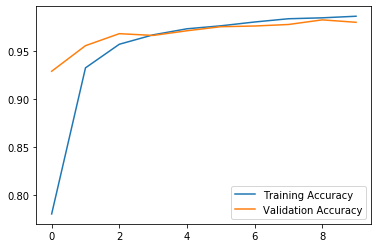

In [0]:
# Plot acciracy over epochs
# print(history.history)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.show()

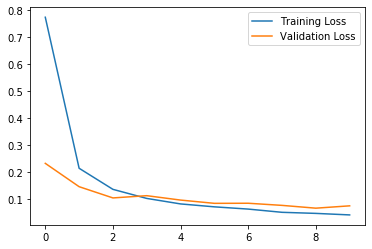

In [0]:
# Plot loss over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()



#**Load Model**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd "drive/My Drive/CS617"

/content/drive/My Drive/CS617


In [4]:
%ls

line_1.jpeg  model1.h5    resized.jpg  test4.jpg  test6.png
line_2.jpeg  model1.json  test/        test5.png


In [6]:
# Load model from disk
from keras.models import model_from_json
# project_dir  = "F:/Semester 8 IIITDMJ/Deep Learning CS617/Project/Experiments/" 
file_name = 'model1'
# json_file = open(project_dir + file_name + '.json', 'r')
json_file = open(file_name + '.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
# loaded_model.load_weights(project_dir + file_name + ".h5")
loaded_model.load_weights(file_name + ".h5")
print("Loaded model from disk")

Loaded model from disk


# **Prediction Functions for Characters**

In [7]:
characters = ['क', 'ख', 'ग', 'घ', 'ङ', 'च', 'छ', 'ज', 'झ', 'ञ', 
              'ट', 'ठ', 'ड', 'ढ', 'ण', 'त', 'थ', 'द', 'ध', 'न', 
              'प', 'फ', 'ब', 'भ', 'म', 'य', 'र', 'ल', 'व', 'श', 
              'ष', 'स', 'ह', 'क्ष', 'त्र', 'ज्ञ', 
              '०', '१', '२', '३', '४', '५', '६', '७', '८', '९']
from PIL import Image
import numpy as np
from matplotlib.pyplot import imshow
import os 

def getFiles(myDir, format='.png'):
	fileList = []
	for root, dirs, files in os.walk(myDir, topdown=False):
	    for name in files:
	        if name.endswith(format):
	            fullName = os.path.join(root, name)
	            fileList.append(fullName)
	return fileList


# image_folder = "F:/Semester 8 IIITDMJ/Deep Learning CS617/Project/dataset/test/"
image_folder = "test"
file_list = getFiles(image_folder)
print(file_list)

['test/1339.png', 'test/2810.png', 'test/3583.png', 'test/3711.png', 'test/3807.png', 'test/4574.png', 'test/4751.png', 'test/4913.png', 'test/5107.png', 'test/5333.png', 'test/5435.png', 'test/5587.png', 'test/5735.png', 'test/5858.png', 'test/7273.png', 'test/me.png', 'test/test.png', 'test/test2.png']


In [0]:
# Predict single letter 32*32 size files (preprocessed file)
# load image (unseen data)
def image_vs_predicted(image_path):
    img_file = Image.open(image_path)
    img_grey = img_file.convert('L')
    value = np.asarray(img_grey.getdata(), dtype=np.int).reshape((img_grey.size[1], img_grey.size[0]))
    imshow(value, cmap = "binary") # plot the test case

    x = np.asarray(img_grey, dtype = np.float32).reshape(1, 32, 32, 1) / 255.0 
    output = loaded_model.predict(x)
    output = output.reshape(46)
    predicted = np.argmax(output)
    devanagari_label = characters[predicted]
    print("Predicted Label : ", devanagari_label)
    success = output[predicted] * 100
    print("With success : ", success)

In [0]:
def predict_letter(img):
  img_grey = img.convert('L')
  value = np.asarray(img_grey.getdata(), dtype=np.int).reshape((img_grey.size[1], img_grey.size[0]))
  print("-------------", value.shape)
  if value.shape[1] == 1:
    return ' ', 100
  plt.imshow(value, cmap = "binary") # plot the test case
  plt.show()
  x = np.asarray(img_grey.getdata(), dtype=np.int).reshape((img_grey.size[1], img_grey.size[0]))
  x = np.asarray(img_grey, dtype = np.float32).reshape(1, 32, 32, 1) / 255.0 
  output = loaded_model.predict(x)
  output = output.reshape(46)
  predicted = np.argmax(output)
  devanagari_label = characters[predicted]
  print("Predicted Label : ", devanagari_label)
  success = output[predicted] * 100
  print("With success : ", success)
  return devanagari_label, success

# **Test Cases**

Predicted Label :  क
With success :  100.0


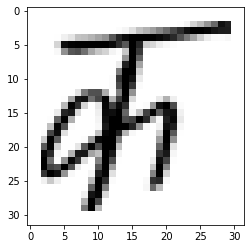

In [10]:
image_vs_predicted(file_list[0])

Predicted Label :  ख
With success :  100.0


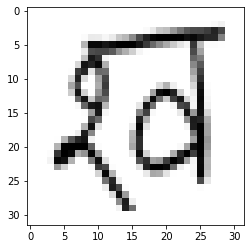

In [11]:
image_vs_predicted(file_list[1])

Predicted Label :  ज्ञ
With success :  99.99998807907104


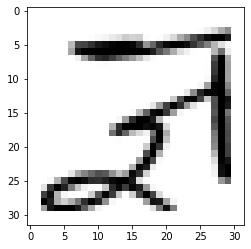

In [12]:
image_vs_predicted(file_list[2])

Predicted Label :  ग
With success :  99.99985694885254


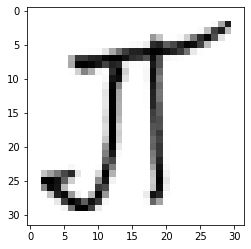

In [13]:
image_vs_predicted(file_list[3])

Predicted Label :  घ
With success :  98.56491684913635


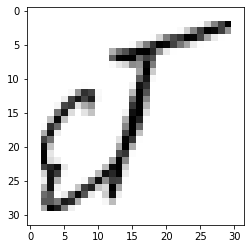

In [14]:
image_vs_predicted(file_list[4])

Predicted Label :  ०
With success :  99.99998807907104


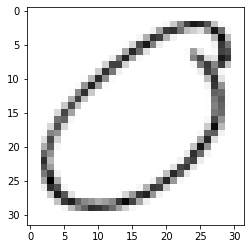

In [15]:
image_vs_predicted(file_list[5])

Predicted Label :  १
With success :  99.99979734420776


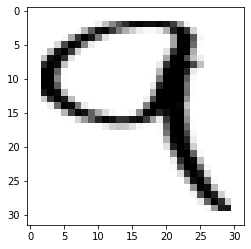

In [16]:
image_vs_predicted(file_list[6])

Predicted Label :  २
With success :  99.99703168869019


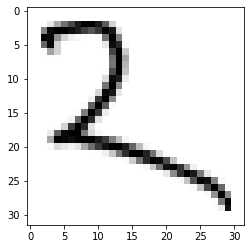

In [17]:
image_vs_predicted(file_list[7])

#**Image Preprocessing for words**

In [0]:
#  imports for preprocessing
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

##Helper Functions


In [0]:
def get_borders(img, bgcolor):
    size = img.shape
    check = int(115 * size[0] / 600)
    # image = img[:]
    top, bottom = 0, size[0] - 1

    #Background color
    bg = np.repeat(bgcolor, size[1])

    # Find the top - when color other than bg is found
    count = 0
    for row in range(1, size[0]):
        if  (np.equal(bg, img[row]).any()) == True:
            count += 1
        else:
            count = 0
        if count >= check:
            top = row - check
            break
    
    
    count = 0
    rows = np.arange(1, size[0])
    for row in rows[::-1]:
        if  (np.equal(bg, img[row]).any()) == True:
            count += 1
        else:
            count = 0
        if count >= check:
            bottom = row + count
            break

    return (top, bottom)

In [0]:
def segmentation(img, thresh):
    # try:
        print("Segmenting the word-----------------")
        shape = img.shape        
        border = img[:]
        check = int(50 * shape[0] / 320)

        # split_img = int(shape[0]/3)
        img = img[check:].T

        shape = img.shape

        bg = np.repeat(255 - thresh, shape[1])
        bg_keys = []
        for row in range(1, shape[0]):
          if  (np.equal(bg, img[row]).all()):
              bg_keys.append(row)

        lenkeys = len(bg_keys)-1
        print(lenkeys)
        new_keys = [bg_keys[1], bg_keys[-1]]
        
        for i in range(1, lenkeys):
            if (bg_keys[i+1] - bg_keys[i]) > check:
                new_keys.append(bg_keys[i])
        
        new_keys = sorted(new_keys)
        #print(new_keys)
        segmented_templates = []
        first = 0
        for key in new_keys[1:]:
          segment = border.T[first:key]
          segmented_templates.append(segment.T)

          plt.imshow(segment.T)
          plt.show()
          first = key

        last_segment = border.T[new_keys[-1]:]
        segmented_templates.append(last_segment.T)

        return(segmented_templates)
    # except:
    #   print("error in segmentation")
    #   return [bordered]

In [0]:
import math
from PIL import ImageOps, ImageFilter

def image_resize(letter_segments, text_color):
    '''
    Resize PIL image keeping ratio and using white background.
    '''

    target_height = 32
    target_width = 32
    target_ratio = target_height / target_width
    letter_segments_resized = []
    check =  len(letter_segments)
    print(len(letter_segments))
    bg_color = (255, 255, 255)
    if text_color == 255:
      bg_color = (0,0,0)
    for img in letter_segments:
      check = check - 1
      shape = img.shape
      im = Image.fromarray(img)
      width, height = im.size  
      if height > 0 and width > 1:
        img_ratio = height/width
        if target_ratio > img_ratio:
            # It must be fixed by width
            resize_width = 30
            resize_height = math.floor(resize_width * img_ratio)
        
        else:
            # Fixed by height
            resize_height = 30
            resize_width = math.floor(resize_height / img_ratio)

        if (resize_height > 0 and resize_width > 0):
          image_resize = im.resize((resize_width, resize_height), Image.ANTIALIAS)
          background = Image.new(mode = "RGB", size = (target_width, target_height), 
                              color = bg_color)
          offset = (round((target_width - resize_width) / 2), round((target_height - resize_height) / 2))
          background.paste(image_resize, offset)
          background.convert('L')
          letter_segments_resized.append(background)
      else:
        background = Image.new(mode = "RGB", size = (1, target_height), 
                              color = bg_color)
        background.convert('L')
        letter_segments_resized.append(background)
    
    # for im in letter_segments_resized:
    #   plt.imshow(im)
    #   plt.show()
    return letter_segments_resized

In [0]:
def split_into_words(img, thresh):

  shape = img.shape
  border = img[:]
  check = int(5 * shape[0] / 320)
  img = img[:].T
  shape = img.shape

  # Background array
  bg = np.repeat(255 - thresh, shape[1])
  bg_keys = []
  for row in range(1, shape[0]):
    if (np.equal(bg, img[row]).all()):
      bg_keys.append(row)          
  
  lenkeys = len(bg_keys)-1
  new_keys = [bg_keys[1], bg_keys[-1]]
  print(new_keys)

  for i in range(1, lenkeys):
    if (bg_keys[i+1] - bg_keys[i]) > check:
      new_keys.append(bg_keys[i])

  new_keys = sorted(new_keys)
  segmented_templates = []
  first = 0
  for key in new_keys[1:]:
    segment = border.T[first:key]
    segmented_templates.append(segment.T)
    ## show words
    first = key

  last_segment = border.T[new_keys[-1]:]
  segmented_templates.append(last_segment.T)

  for shw in segmented_templates:
    plt.imshow(shw)
    plt.show()
  return segmented_templates
  


In [0]:
def split_into_lines(img, thresh):

  shape = img.shape
  border = img[:]
  check = int(5 * shape[0] / 320)
  img = img[check:]
  shape = img.shape ##height, width
  # Background array 
  bg = np.repeat(255 - thresh, shape[1])
  print(bg.shape)
  bg_keys = []
  for row in range(1, shape[0]):
    # print(row)
    if (np.equal(bg, img[row]).all()):
      bg_keys.append(row)          

  lenkeys = len(bg_keys)-1
  new_keys = [bg_keys[1], bg_keys[-1]]

  for i in range(1, lenkeys):
    if (bg_keys[i+1] - bg_keys[i]) > check:
      new_keys.append(bg_keys[i])

  new_keys = sorted(new_keys)
  segmented_templates = []
  first = 0
  for key in new_keys[1:]:
    print("Inside keys")
    segment = border[first:key]
    segmented_templates.append(segment)
    ## show words
    first = key
  
  last_segment = border[new_keys[-1]:]
  segmented_templates.append(last_segment)
  for shw in segmented_templates:
    plt.imshow(shw)
    plt.show()
  return segmented_templates
  


##Preprocess Image main function


In [0]:
def preprocess_image(img_unp):
  resized_image = 0
  trimmed_img = 0
  inv_img = 0
  text_color = 0
  letters = []
  # Convert Image to grey
  img = Image.open(img_unp).convert('L')
  img = cv2.imread(img_unp, 0)

  plt.imshow(img)
  plt.show()

  blur = cv2.GaussianBlur(img,(5,5),0)
  ret, inv_img = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU) #converts black to white and inverse

  rows, cols = inv_img.shape

  bg_test = np.array([inv_img[i][i] for i in range(5)])
  text_color = 0
  if bg_test.all() == 0:
      text_color = 255

  top_bottom = get_borders(inv_img, text_color)
  left_right = get_borders(inv_img.T, text_color) # Use same code to trim left and right sides by sending img transpose

  control_var = 2
  trimmed_img = inv_img[top_bottom[0] + control_var : top_bottom[1] - control_var, left_right[0] + control_var : left_right[1] - control_var]

  line_segments = split_into_lines(trimmed_img, text_color) ## Has an array of width 1 in the end

  for line in line_segments:
    ## Trim Line
    top_bottom = get_borders(line, text_color)
    left_right = get_borders(line.T, text_color) # Use same code to trim left and right sides by sending img transpose

    control_var = 2
    trimmed_img = line[top_bottom[0] + control_var : top_bottom[1] - control_var, left_right[0] + control_var : left_right[1] - control_var]

    word_segments = split_into_words(trimmed_img, text_color) ## Has an array of width 1 in the end

    for inv_img in word_segments:
      ## Trim word
      top_bottom = get_borders(inv_img, text_color)
      left_right = get_borders(inv_img.T, text_color) # Use same code to trim left and right sides by sending img transpose
      control_var = 0
      trimmed_img = inv_img[top_bottom[0] + control_var : top_bottom[1] - control_var, left_right[0] + control_var : left_right[1] - control_var]
      
      ## Seperate into letters - trimmed_img here is a word
      letter_segments = segmentation(trimmed_img, text_color)

      ## resize the letters to fit 32*32 
      resized_image = image_resize(letter_segments, text_color)
      letters.extend(resized_image)
      # letters.extend('space')
  return letters


In [0]:
# path_1 = "test5.png"
# preprocess_image(path_1)

#**Recognition**

In [0]:
def recognition_word(img_path):
  print("Inside word recognition")
  letters = preprocess_image(img_path)
  labels = []
  accuracy = []
  for letter in letters:
    if isinstance(letter , (np.ndarray, np.generic) ):
      labels.append(' ')
      accuracy.append(100)
    else:
      predicted_label, success = predict_letter(letter)
      accuracy.append(success)
      labels.append(predicted_label)
  print("----------------------------------------------------------")
  print(*labels, sep = "") 
  return

Inside word recognition


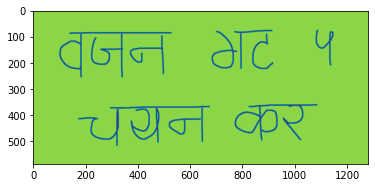

(1044,)
Inside keys


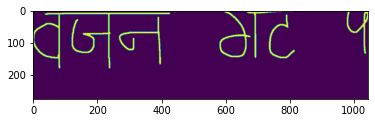

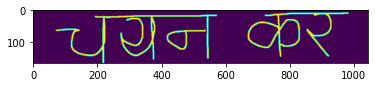

[426, 578]


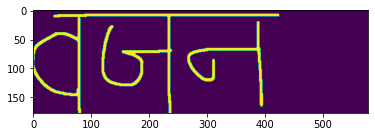

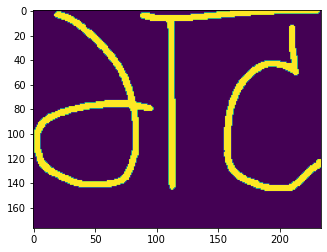

Segmenting the word-----------------
88


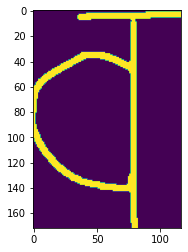

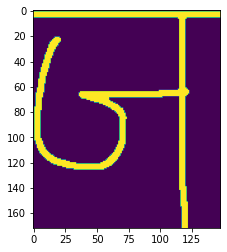

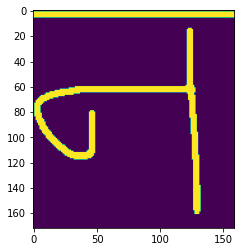

4
Segmenting the word-----------------
50


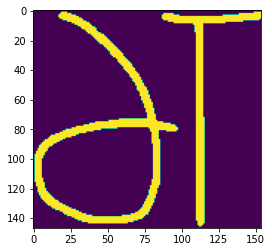

2
[504, 597]


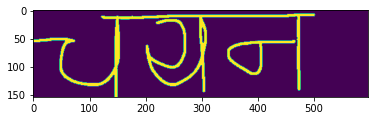

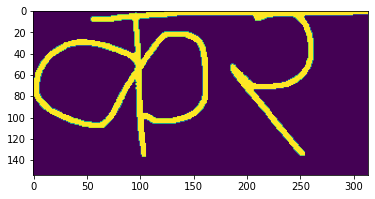

Segmenting the word-----------------
109


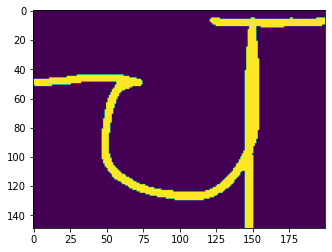

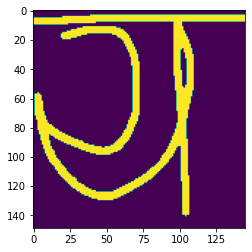

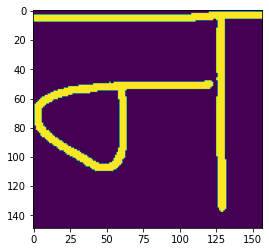

4
Segmenting the word-----------------
71


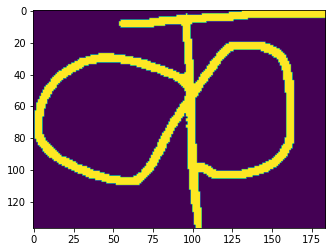

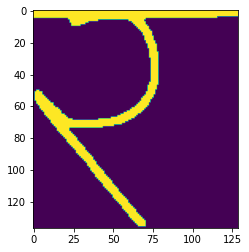

3
------------- (32, 32)


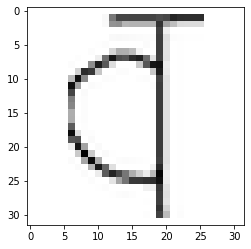

Predicted Label :  व
With success :  48.91820847988129
------------- (32, 32)


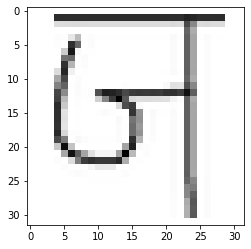

Predicted Label :  ज
With success :  84.85068678855896
------------- (32, 32)


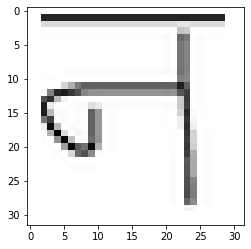

Predicted Label :  न
With success :  87.35259175300598
------------- (32, 1)
------------- (32, 32)


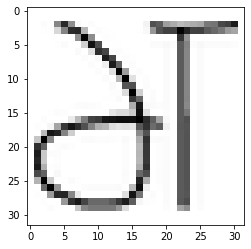

Predicted Label :  भ
With success :  46.340036392211914
------------- (32, 32)


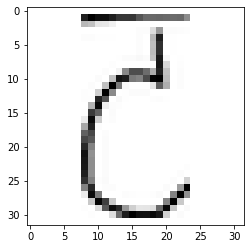

Predicted Label :  ट
With success :  93.95875930786133
------------- (32, 32)


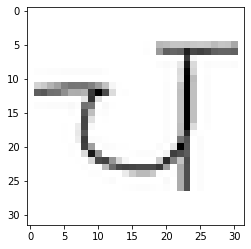

Predicted Label :  च
With success :  98.9113450050354
------------- (32, 32)


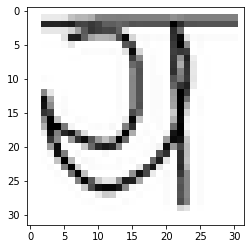

Predicted Label :  ध
With success :  35.512205958366394
------------- (32, 32)


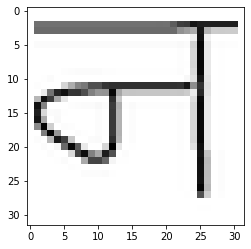

Predicted Label :  ज्ञ
With success :  58.7336003780365
------------- (32, 1)
------------- (32, 32)


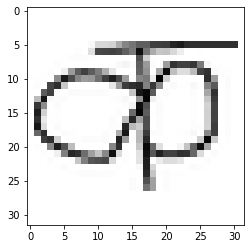

Predicted Label :  क
With success :  76.1837363243103
------------- (32, 32)


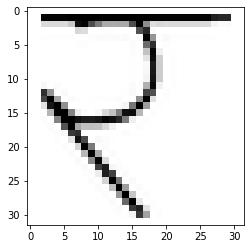

Predicted Label :  र
With success :  57.16328024864197
------------- (32, 1)
----------------------------------------------------------
वजन भटचधज्ञ कर 


In [121]:
recognition_word("page_2.jpeg")